# **Word embeddings for deep learning**
- Installing dependencies:
- Loading the Dataset:
- Basic operations on data:
- Gensium data cleaning process:
- Word2Vec model:
- GloVe model:
- Word2Vec to dataset:

### **Installing dependencies:**

In [17]:
# Supporting scientific library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visulization Library
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px

# Text Pre-processing Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

### **Loading the Dataset:**

In [18]:
import gensim
data = pd.read_json('https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json',lines=True)
data.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

### **Basic operations on data:**

In [19]:
print(data.info())
print('------------------[Data Description]--------------------')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
None
------------------[Data Description]--------------------
       is_sarcastic
count  28619.000000
mean       0.476397
std        0.499451
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


### **Graphical Representation:**

Text(0.5, 0, 'Target')

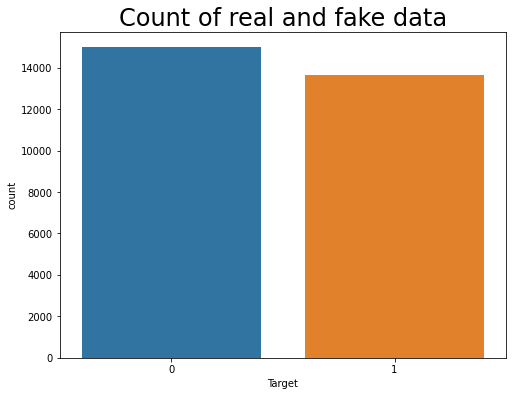

In [20]:
target_counts=data['is_sarcastic'].value_counts()
plt.figure(figsize = (8,6))
sns.barplot(y=target_counts,x=target_counts.index)
plt.title("Count of real and fake data",fontsize = 24)
plt.ylabel('count')
plt.xlabel('Target')

In [21]:
px.pie(data,names='is_sarcastic',labels=['Sarcastic','Acclaim'],title='Sarcasam Vs Acclaim',template='plotly_white')

### **Gensium data cleaning process:**

In [22]:
headline_cleaned = data.headline.apply(gensim.utils.simple_preprocess)

In [23]:
headline_cleaned

0        [thirtysomething, scientists, unveil, doomsday...
1        [dem, rep, totally, nails, why, congress, is, ...
2        [eat, your, veggies, deliciously, different, r...
3        [inclement, weather, prevents, liar, from, get...
4        [mother, comes, pretty, close, to, using, word...
                               ...                        
28614    [jews, to, celebrate, rosh, hashasha, or, some...
28615    [internal, affairs, investigator, disappointed...
28616    [the, most, beautiful, acceptance, speech, thi...
28617    [mars, probe, destroyed, by, orbiting, spielbe...
28618              [dad, clarifies, this, not, food, stop]
Name: headline, Length: 28619, dtype: object

In [24]:
headline_cleaned.loc[0]

['thirtysomething',
 'scientists',
 'unveil',
 'doomsday',
 'clock',
 'of',
 'hair',
 'loss']

### **Generating word cloud:**

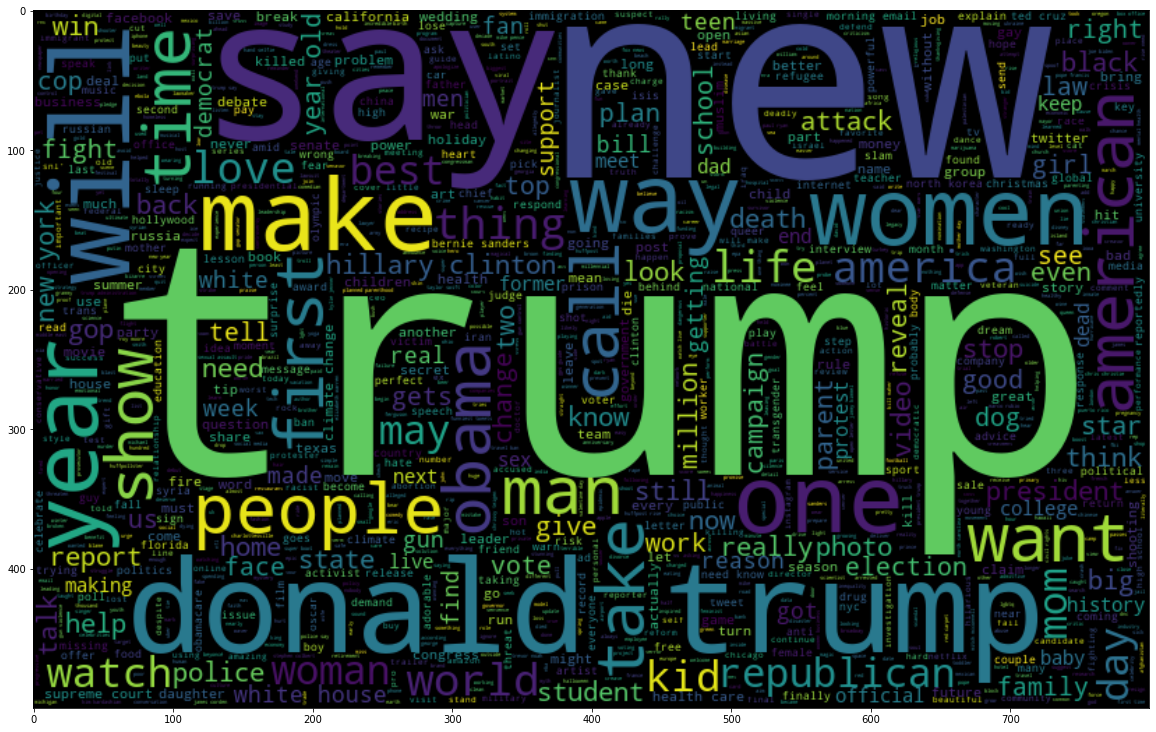

In [7]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 1500 , width = 800 , height = 500).generate(" ".join(data[data.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

### **Word2Vec Model:**

In [8]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

In [3]:
word2vec_model.most_similar("girl")

[('boy', 0.8543272018432617),
 ('teenage_girl', 0.7927976250648499),
 ('woman', 0.7494640946388245),
 ('teenager', 0.717249870300293),
 ('schoolgirl', 0.7075953483581543),
 ('teenaged_girl', 0.6650916337966919),
 ('daughter', 0.6489864587783813),
 ('mother', 0.6478164196014404),
 ('toddler', 0.6473966836929321),
 ('girls', 0.6154742240905762)]

In [6]:
word2vec_model.most_similar(positive=['woman','king'],negative=['man'],topn=1)

[('queen', 0.7118192911148071)]

### **GloVe model:**

In [7]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [8]:
glove_model.most_similar("girl")

[('boy', 0.8272891044616699),
 ('woman', 0.729641854763031),
 ('girls', 0.7227291464805603),
 ('teenager', 0.650977373123169),
 ('teenage', 0.6492719650268555),
 ('mother', 0.6417974829673767),
 ('boys', 0.6283578872680664),
 ('child', 0.6229295134544373),
 ('teen', 0.612524151802063),
 ('daughter', 0.6050207614898682)]

In [9]:
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.6770139336585999)]

### **Word2Vec to Data:**

In [12]:
import gensim
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [31]:
model.build_vocab(headline_cleaned, progress_per=1000)
model.train(headline_cleaned, total_examples=model.corpus_count, epochs=model.epochs)
model.save("./word2vec-News-Headlines-Dataset-For-Sarcasm-Detectio-short.model")

RuntimeError: ignored

In [30]:
model.wv.most_similar("perfect")

[('it', 0.9998210668563843),
 ('hands', 0.9998112916946411),
 ('prince', 0.9997819066047668),
 ('finds', 0.9997656941413879),
 ('mario', 0.9997637867927551),
 ('vote', 0.9997513294219971),
 ('marriage', 0.9997478723526001),
 ('hate', 0.9997462034225464),
 ('supported', 0.9997455477714539),
 ('hypocrisy', 0.9997430443763733)]

In [ ]:
model.wv.similarity(w1="song", w2="crime")

0.999804

In [ ]:
model.wv.similarity(w1="car", w2="tree")

0.9998081